In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('data.csv')

In [8]:
#add in dropping outcome characteristics
data.drop(labels='outcome_month', axis=1, inplace=True)
data.drop(labels='outcome_year', axis=1, inplace=True)
data.drop(labels='outcome_weekday', axis=1, inplace=True)
data.drop(labels='outcome_hour', axis=1, inplace=True)

In [10]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [11]:
data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_month,intake_year,intake_weekday,intake_hour
0,1,2,10,2,1982,527,27351,3,3,2,10,12,2017,4,14
1,1,2,7,2,1982,527,23499,3,2,2,7,12,2014,0,10
2,1,2,6,2,1982,527,23500,3,2,2,6,3,2014,0,14
3,1,2,10,2,830,449,25821,3,1,2,10,4,2014,6,15
4,1,2,16,2,1880,183,3300,2,2,2,16,11,2013,2,9


In [12]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [13]:
data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_years,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_years,intake_month,intake_year,intake_weekday,intake_hour
0,1,2,10,2,1982,527,27351,3,3,2,10,12,2017,4,14
1,1,2,7,2,1982,527,23499,3,2,2,7,12,2014,0,10
2,1,2,6,2,1982,527,23500,3,2,2,6,3,2014,0,14
3,1,2,10,2,830,449,25821,3,1,2,10,4,2014,6,15
4,1,2,16,2,1880,183,3300,2,2,2,16,11,2013,2,9


In [14]:
x_train, x_val, y_train, y_val = train_test_split(data.drop('outcome_type', axis=1), data['outcome_type'], test_size=0.2, random_state=42)

In [15]:
x_train.head()

,sex_upon_outcome,age_upon_outcome_years,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_years,intake_month,intake_year,intake_weekday,intake_hour
18828,3,0,2,1741,373,14768,3,3,0,0,7,2014,4,16
56226,1,0,1,952,88,32034,3,3,1,0,9,2016,1,14
28389,2,2,2,1761,56,30074,3,3,1,2,2,2015,4,18
61141,2,0,1,946,62,4787,3,3,1,0,12,2016,4,10
61701,1,1,2,670,356,12934,3,3,1,1,1,2017,0,14


In [16]:
le = LabelEncoder()

In [17]:
y_train = le.fit_transform(y_train)

In [18]:
y_val = le.transform(y_val)

In [19]:
hyperparameters_sklearn = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': range(2, 201),
    'learning_rate': [0.001, 0.01, 0.1],
    'min_child_weight': [0.01, 0.1, 1, 10],
    'subsample': [0.1, 0.5, 1.0],
    'colsample_bytree': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 1, 10]
}

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
!pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)


In [22]:
import lightgbm as lgb

In [23]:
clf = lgb.LGBMClassifier()

In [24]:
search = RandomizedSearchCV(clf,
                            hyperparameters_sklearn,
                            n_iter=10,
                            cv=5,
                            random_state=42,
                            scoring='roc_auc',
                            n_jobs=-1)

In [25]:
search.fit(x_train, y_train, eval_metric='auc')

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 

In [26]:
print('Best hyperparameters: ', search.best_params_)

Best hyperparameters:  {'subsample': 1.0, 'reg_lambda': 1, 'num_leaves': 180, 'min_child_weight': 0.1, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'dart'}


In [27]:
print('Best AUC score: ', search.best_score_)

Best AUC score:  0.8965990179030813


In [28]:
clf_predict = search.predict(x_val)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_val, clf_predict))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6716
           1       0.85      0.82      0.84      9217

    accuracy                           0.82     15933
   macro avg       0.81      0.81      0.81     15933
weighted avg       0.82      0.82      0.82     15933



In [33]:
import lightgbm as lgb

In [34]:
#using best hyperparameters from hpo output
model = lgb.LGBMClassifier(subsample = 1.0, reg_lambda= 1, num_leaves = 180, min_child_weight = 0.1, learning_rate  = 0.1, colsample_bytree = 0.5, boosting_type = 'dart', random_state=42)

In [35]:
model.fit(x_train, y_train, eval_set=[(x_val,y_val), (x_train,y_train)], verbose=20, eval_metric='logloss')

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.470722	valid_0's binary_logloss: 0.48421
[40]	training's binary_logloss: 0.44058	valid_0's binary_logloss: 0.46127
[60]	training's binary_logloss: 0.412532	valid_0's binary_logloss: 0.438524
[80]	training's binary_logloss: 0.406808	valid_0's binary_logloss: 0.435382
[100]	training's binary_logloss: 0.389867	valid_0's binary_logloss: 0.422239


LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=180, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_val,y_val)))

Training accuracy 0.8416
Testing accuracy 0.8136


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

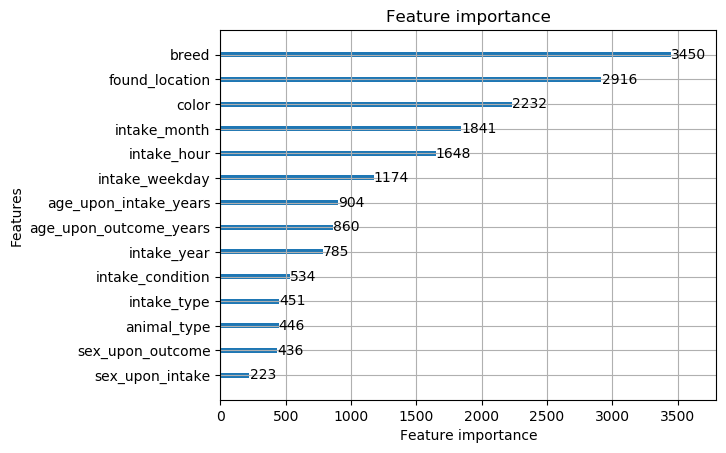

In [38]:
lgb.plot_importance(model)

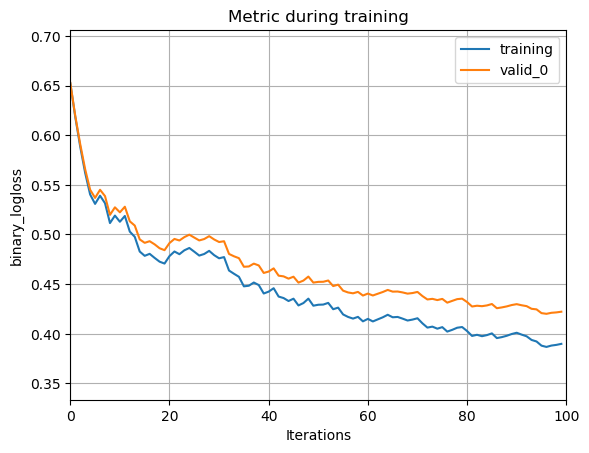

In [39]:
lgb.plot_metric(model)